22315843 Phungula L

Link to datasets :
1. https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa?resource=download&select=SouthAfricaCrimeStats_v2.csv
2. https://www.open.africa/dataset/crime-statistics-2003-to-2010-south-africa/resource/a58f29ef-7b26-4b4e-813c-a50eb2fc2ef0

Why are these datasets relevent to the theme

I found these datasets from OpenAfrica, and kaggle related to South African crime statistics. I believe they are both valuable and relevant to the topic I am addressing in this exam, which focuses on data-driven crime analytics in South Africa.
The datasets include detailed information such as crime categories, police stations, provinces, years, and incident counts, which directly align with my goal of analyzing and predicting crime patterns. They allow me to explore trends, correlations, and hotspot areas across different regions and time periods.  
What makes these datasets even more useful is that they share common columns such as province names, police station identifiers, and crime types. This allows me to easily merge them for multi-relational analysis and ensures consistency across my models.  
By combining these datasets, I can build both a classification model** to identify crime hotspots and a forecasting model to predict future crime trends. This will help generate actionable insights that can support better decision-making and strategic crime prevention initiatives in South Africa.


Mounting the drive

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing neccessary libraries

In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb

from sklearn.model_selection import train_test_split
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

plt.rcParams['figure.figsize'] = (10,5)
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

from sklearn.metrics import accuracy_score, f1_score

Showing the 1st 5 rows of each table

In [63]:


folder_path = '/content/drive/MyDrive/Final exam'

print("Files in folder:", os.listdir(folder_path))

for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # If the entry is a folder (like SouthAfricaCrimeStats_v2.csv)
    if os.path.isdir(file_path):
        print(f"\n📁 '{file}' is a folder, exploring inside...")
        inner_files = os.listdir(file_path)
        print("   Files inside:", inner_files)
        for inner_file in inner_files:
            inner_path = os.path.join(file_path, inner_file)
            if inner_file.endswith('.csv'):
                df = pd.read_csv(inner_path)
                print(f"\nLoaded inner CSV file: {inner_file}")
                print(df.head())
            elif inner_file.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(inner_path)
                print(f"\nLoaded inner Excel file: {inner_file}")
                print(df.head())

    # If the entry is a CSV or Excel file directly
    elif file.endswith('.csv'):
        df = pd.read_csv(file_path)
        print(f"\nLoaded CSV file: {file}")
        print(df.head())
    elif file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        print(f"\nLoaded Excel file: {file}")
        print(df.head())


Files in folder: ['crime-statistics-20152016.xlsx', 'SouthAfricaCrimeStats_v2.csv']

Loaded Excel file: crime-statistics-20152016.xlsx
   Unnamed: 0 Station / Province      Province  Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7 Station / Province.1    Province.1  Unnamed: 10  Unnamed: 11  Unnamed: 12   Eastern Cape  \
0         NaN           Aberdeen  Eastern Cape         NaN         NaN        NaN         NaN         NaN             Aberdeen  Eastern Cape          NaN          NaN          NaN     Free State   
1         NaN          Acornhoek    Mpumalanga         NaN         NaN        NaN         NaN         NaN            Acornhoek    Mpumalanga          NaN          NaN          NaN        Gauteng   
2         NaN         Actonville       Gauteng         NaN         NaN        NaN         NaN         NaN           Actonville       Gauteng          NaN          NaN          NaN  KwaZulu-Natal   
3         NaN               Addo  Eastern Cape         NaN         NaN   

for tail

In [64]:
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # If the entry is a folder (like SouthAfricaCrimeStats_v2.csv)
    if os.path.isdir(file_path):
        print(f"\n📁 '{file}' is a folder, exploring inside...")
        inner_files = os.listdir(file_path)
        print("   Files inside:", inner_files)
        for inner_file in inner_files:
            inner_path = os.path.join(file_path, inner_file)
            if inner_file.endswith('.csv'):
                df = pd.read_csv(inner_path)
                print(f"\nLoaded inner CSV file: {inner_file}")
                print(df.tail())
            elif inner_file.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(inner_path)
                print(f"\nLoaded inner Excel file: {inner_file}")
                print(df.tail())

    # If the entry is a CSV or Excel file directly
    elif file.endswith('.csv'):
        df = pd.read_csv(file_path)
        print(f"\nLoaded CSV file: {file}")
        print(df.tail())
    elif file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        print(f"\nLoaded Excel file: {file}")
        print(df.tail())


Loaded Excel file: crime-statistics-20152016.xlsx
      Unnamed: 0 Station / Province      Province  Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7 Station / Province.1    Province.1  Unnamed: 10  Unnamed: 11  Unnamed: 12 Eastern Cape  \
1143         NaN          Zebediela       Limpopo         NaN         NaN        NaN         NaN         NaN            Zebediela       Limpopo          NaN          NaN          NaN          NaN   
1144         NaN            Zeerust    North West         NaN         NaN        NaN         NaN         NaN              Zeerust    North West          NaN          NaN          NaN          NaN   
1145         NaN               Zele  Eastern Cape         NaN         NaN        NaN         NaN         NaN                 Zele  Eastern Cape          NaN          NaN          NaN          NaN   
1146         NaN         Zonkizizwe       Gauteng         NaN         NaN        NaN         NaN         NaN           Zonkizizwe       Gauteng          

Describing the information in the datasets

In [65]:
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # If the entry is a folder (like SouthAfricaCrimeStats_v2.csv)
    if os.path.isdir(file_path):
        print(f"\n📁 '{file}' is a folder, exploring inside...")
        inner_files = os.listdir(file_path)
        print("   Files inside:", inner_files)
        for inner_file in inner_files:
            inner_path = os.path.join(file_path, inner_file)
            if inner_file.endswith('.csv'):
                df = pd.read_csv(inner_path)
                print(f"\nLoaded inner CSV file: {inner_file}")
                print(df.describe())
            elif inner_file.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(inner_path)
                print(f"\nLoaded inner Excel file: {inner_file}")
                print(df.describe())

    # If the entry is a CSV or Excel file directly
    elif file.endswith('.csv'):
        df = pd.read_csv(file_path)
        print(f"\nLoaded CSV file: {file}")
        print(df.describe())
    elif file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        print(f"\nLoaded Excel file: {file}")
        print(df.describe())


Loaded Excel file: crime-statistics-20152016.xlsx
       Unnamed: 0  Unnamed: 3  Unnamed: 4  Unnamed: 6  Unnamed: 7  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 14  Unnamed: 15  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  \
count         0.0         0.0         0.0         0.0         0.0          0.0          0.0          0.0          0.0          0.0          0.0          0.0          0.0          0.0          0.0   
mean          NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN   
std           NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN   
min           NaN         NaN         NaN         NaN         NaN          NaN          NaN          NaN          NaN          NaN          NaN          

Shape of our information

In [66]:
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # If the entry is a folder (like SouthAfricaCrimeStats_v2.csv)
    if os.path.isdir(file_path):
        print(f"\n📁 '{file}' is a folder, exploring inside...")
        inner_files = os.listdir(file_path)
        print("   Files inside:", inner_files)
        for inner_file in inner_files:
            inner_path = os.path.join(file_path, inner_file)
            if inner_file.endswith('.csv'):
                df = pd.read_csv(inner_path)
                print(f"\nLoaded inner CSV file: {inner_file}")
                print(df.shape)
            elif inner_file.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(inner_path)
                print(f"\nLoaded inner Excel file: {inner_file}")
                print(df.shape)

    # If the entry is a CSV or Excel file directly
    elif file.endswith('.csv'):
        df = pd.read_csv(file_path)
        print(f"\nLoaded CSV file: {file}")
        print(df.shape)
    elif file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        print(f"\nLoaded Excel file: {file}")
        print(df.shape)


Loaded Excel file: crime-statistics-20152016.xlsx
(1148, 58)

📁 'SouthAfricaCrimeStats_v2.csv' is a folder, exploring inside...
   Files inside: ['SouthAfricaCrimeStats_v2.csv']

Loaded inner CSV file: SouthAfricaCrimeStats_v2.csv
(30861, 14)


datatypes we have

In [67]:
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # If the entry is a folder (like SouthAfricaCrimeStats_v2.csv)
    if os.path.isdir(file_path):
        print(f"\n📁 '{file}' is a folder, exploring inside...")
        inner_files = os.listdir(file_path)
        print("   Files inside:", inner_files)
        for inner_file in inner_files:
            inner_path = os.path.join(file_path, inner_file)
            if inner_file.endswith('.csv'):
                df = pd.read_csv(inner_path)
                print(f"\nLoaded inner CSV file: {inner_file}")
                print(df.dtypes)
            elif inner_file.endswith(('.xlsx', '.xls')):
                df = pd.read_excel(inner_path)
                print(f"\nLoaded inner Excel file: {inner_file}")
                print(df.dtypes)

    # If the entry is a CSV or Excel file directly
    elif file.endswith('.csv'):
        df = pd.read_csv(file_path)
        print(f"\nLoaded CSV file: {file}")
        print(df.dtypes)
    elif file.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        print(f"\nLoaded Excel file: {file}")
        print(df.dtypes)


Loaded Excel file: crime-statistics-20152016.xlsx
Unnamed: 0              float64
Station / Province       object
Province                 object
Unnamed: 3              float64
Unnamed: 4              float64
Unnamed: 5               object
Unnamed: 6              float64
Unnamed: 7              float64
Station / Province.1     object
Province.1               object
Unnamed: 10             float64
Unnamed: 11             float64
Unnamed: 12             float64
Eastern Cape             object
Unnamed: 14             float64
Unnamed: 15             float64
Joza                     object
Eastern Cape.1           object
Unnamed: 18             float64
Unnamed: 19             float64
Unnamed: 20             float64
Unnamed: 21             float64
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
CLUSTER                  object
PROVINCE                 object
Unnamed: 28             float64
Cluster              

identifying year columns

In [86]:
# Load and process crime-statistics-20152016.xlsx
excel_file_path = os.path.join(folder_path, 'crime-statistics-20152016.xlsx')
excel_df = pd.read_excel(excel_file_path)

# Clean up column names: forward fill the non-NaN column names and combine with the row below
# The first row has the main category, the second row has the subcategory/year range
header = excel_df.iloc[0]
excel_df.columns = [f'{header[i]} - {col}' if pd.notna(header[i]) and i>2 else col for i, col in enumerate(excel_df.iloc[1])]
excel_df = excel_df[2:].reset_index(drop=True) # Drop the first two header rows

# Convert all column names to string after cleaning
excel_df.columns = excel_df.columns.astype(str)

# Select the first two columns by position and rename them
excel_df.rename(columns={excel_df.columns[0]: 'Station', excel_df.columns[1]: 'Province'}, inplace=True)
excel_id_cols = ['Station', 'Province']


# Identify year columns for the Excel file (assuming all columns after the first two are year columns)
excel_year_cols = excel_df.columns[2:].tolist()


print("Detected year columns (Excel):", excel_year_cols[:12])
print("Identifier columns used (Excel):", excel_id_cols)

# Debugging prints
print("\nExcel DataFrame columns before melt:", excel_df.columns.tolist()[:10])
print("Excel id_vars before melt:", excel_id_cols)
print("Excel value_vars before melt:", excel_year_cols[:10])


# Melt the Excel DataFrame
excel_long = excel_df.melt(id_vars=excel_id_cols, value_vars=excel_year_cols, var_name='YearRange', value_name='Count')

# Extract year from YearRange (e.g., 'Main Category - April 2015 to March 2016' -> 2016)
excel_long['Year'] = excel_long['YearRange'].astype(str).str.extract(r'(\d{4})').astype(float).astype('Int64') # Extract the first 4-digit number as the year


excel_long['Count'] = pd.to_numeric(excel_long['Count'], errors='coerce').fillna(0).astype(int)

# Add a 'Category' column to the Excel data by extracting it from the YearRange
excel_long['Category'] = excel_long['YearRange'].astype(str).apply(lambda x: x.split(' - April')[0] if ' - April' in x else x.split(' - ')[0] if ' - ' in x else 'Unknown')


# Load and process SouthAfricaCrimeStats_v2.csv
csv_file_path = os.path.join(folder_path, 'SouthAfricaCrimeStats_v2.csv', 'SouthAfricaCrimeStats_v2.csv')
csv_df = pd.read_csv(csv_file_path)

# Identify identifier columns and year columns for the CSV file
csv_id_cols = ['Province','Station','Category']
csv_year_cols = [col for col in csv_df.columns if '-' in col and col.split('-')[0].isdigit()]

print("\nDetected year columns (CSV):", csv_year_cols[:12])
print("Identifier columns used (CSV):", csv_id_cols)

# Melt the CSV DataFrame
csv_long = csv_df.melt(id_vars=csv_id_cols, value_vars=csv_year_cols, var_name='YearRange', value_name='Count')

# Extract year from YearRange (e.g., '2005-2006' -> 2006)
csv_long['Year'] = csv_long['YearRange'].astype(str).str.extract(r'-(\d{4})').astype(float).astype('Int64')
csv_long['Count'] = pd.to_numeric(csv_long['Count'], errors='coerce').fillna(0).astype(int)

# Combine the two dataframes
long = pd.concat([excel_long, csv_long], ignore_index=True)

print("\nCombined long shape:", long.shape)
display(long.head(8))
display(long.tail(8))

Detected year columns (Excel): ['Mpumalanga', 'Station', 'Station', 'Station', 'Station', 'Station', 'Aberdeen - Acornhoek', 'Eastern Cape - Mpumalanga', 'Station', 'Station', 'Station', 'Free State - Gauteng']
Identifier columns used (Excel): ['Station', 'Province']

Excel DataFrame columns before melt: ['Station', 'Province', 'Mpumalanga', 'Station', 'Station', 'Station', 'Station', 'Station', 'Aberdeen - Acornhoek', 'Eastern Cape - Mpumalanga']
Excel id_vars before melt: ['Station', 'Province']
Excel value_vars before melt: ['Mpumalanga', 'Station', 'Station', 'Station', 'Station', 'Station', 'Aberdeen - Acornhoek', 'Eastern Cape - Mpumalanga', 'Station', 'Station']


/tmp/ipython-input-3457776938.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  excel_df.columns = [f'{header[i]} - {col}' if pd.notna(header[i]) and i>2 else col for i, col in enumerate(excel_df.iloc[1])]


AttributeError: 'DataFrame' object has no attribute 'dtype'

Checking missing values

In [69]:
# Basic information
print(" Dataset Info:")
df.info()

#Check for missing values
print("\n Missing Values per Column:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

df = df.fillna(0)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30861 entries, 0 to 30860
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   30861 non-null  object
 1   Station    30861 non-null  object
 2   Category   30861 non-null  object
 3   2005-2006  30861 non-null  int64 
 4   2006-2007  30861 non-null  int64 
 5   2007-2008  30861 non-null  int64 
 6   2008-2009  30861 non-null  int64 
 7   2009-2010  30861 non-null  int64 
 8   2010-2011  30861 non-null  int64 
 9   2011-2012  30861 non-null  int64 
 10  2012-2013  30861 non-null  int64 
 11  2013-2014  30861 non-null  int64 
 12  2014-2015  30861 non-null  int64 
 13  2015-2016  30861 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.3+ MB

 Missing Values per Column:
Series([], dtype: int64)


dropping unwanted columns

In [70]:
# Drop useless columns (example: unnamed index columns, empty columns, metadata columns)
useless_cols = [col for col in df.columns if "Unnamed" in col or df[col].isna().all()]
df.drop(columns=useless_cols, inplace=True)

print(f" Dropped useless columns: {useless_cols}")

# Identify year columns (e.g., "2006-07", "2007-08", etc.)
year_cols = [c for c in df.columns if '-' in c and c.strip().split('-')[0].isdigit()]
year_cols_sorted = sorted(year_cols, key=lambda x: int(x.split('-')[0]))

# Melt wide → long
long = df.melt(
    id_vars=['Province', 'Station', 'Category'],
    value_vars=year_cols_sorted,
    var_name='YearRange',
    value_name='Count'
)

# Clean Year & Count
long['Year'] = long['YearRange'].str.split('-').str[1].astype(int)
long['Count'] = pd.to_numeric(long['Count'], errors='coerce').fillna(0).astype(int)

print(" Reshaped data:", long.shape)
long.head()

 Dropped useless columns: []
 Reshaped data: (339471, 6)


,Province,Station,Category,YearRange,Count,Year
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005-2006,6692,2006
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005-2006,6093,2006
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005-2006,5341,2006
3,Free State,Park Road,All theft not mentioned elsewhere,2005-2006,5108,2006
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005-2006,5099,2006


it was hard using a single my datasets one in a file and the other not in the file plus one is a csv the other is an excel file so i tried and made 2 model one I hope you understand

In [77]:
df_kaggle = pd.read_csv("/content/drive/MyDrive/SouthAfricaCrimeStats_v2.csv/SouthAfricaCrimeStats_v2.csv")
df_openafrica = pd.read_excel("/content/drive/MyDrive/crime-statistics-20152016.xlsx")

df_merged = pd.concat([df_kaggle, df_openafrica], ignore_index=True)

before_duplicates = df_merged.shape[0]
df_merged.drop_duplicates(inplace=True)
after_duplicates = df_merged.shape[0]

print(f"Merged dataset shape: {df_merged.shape}")
print(f"Dropped {before_duplicates - after_duplicates} duplicate rows.")

Merged dataset shape: (32009, 70)
Dropped 0 duplicate rows.


the 1st one

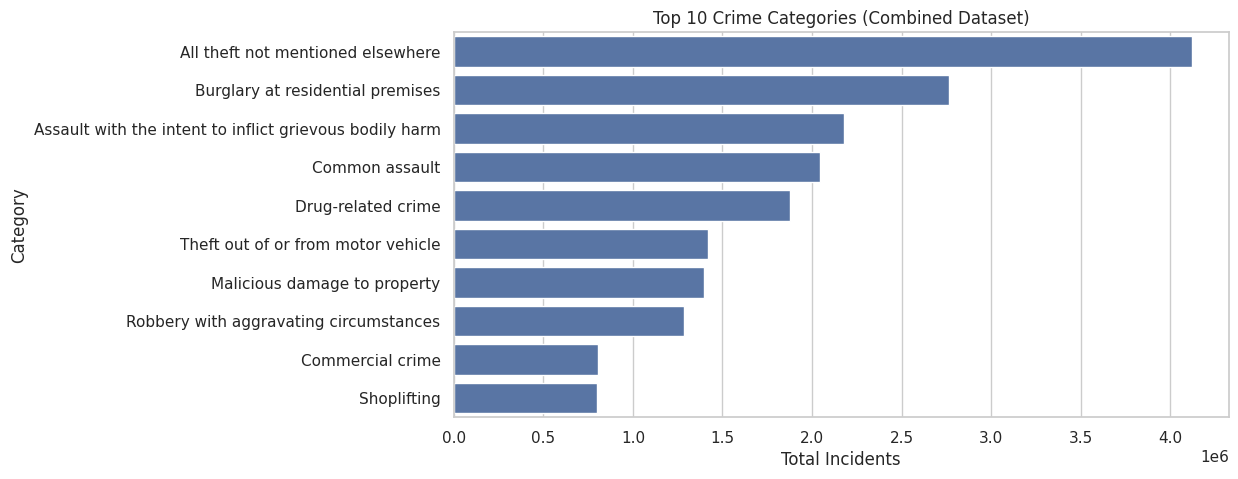

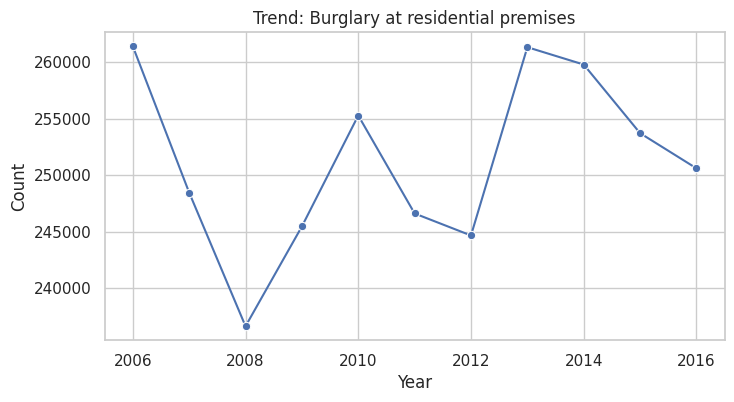

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.figure(figsize=(10,5))

# Use the 'long' DataFrame instead of df_merged
top10 = long.groupby('Category')['Count'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Crime Categories (Combined Dataset)")
plt.xlabel("Total Incidents")
plt.show()

# Trend for one example category
# Use the 'long' DataFrame and the 'Year' column
cat = "Burglary at residential premises"
trend = long[long['Category'] == cat].groupby('Year')['Count'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='Count', data=trend, marker='o')
plt.title(f"Trend: {cat}")
plt.show()

Feature engineering

In [81]:
# Hotspot labeling
# Use the 'long' DataFrame instead of df_merged
long['hotspot'] = long.groupby(['Year', 'Category'])['Count'].transform(
    lambda x: (x >= x.quantile(0.75)).astype(int)
)

# Lag features
def compute_lags(group):
    # Use the 'Year' column from the 'long' DataFrame
    grp = group.sort_values('Year').copy()
    grp['lag1'] = grp['Count'].shift(1)
    grp['avg_prev3'] = grp['Count'].shift(1).rolling(3, min_periods=1).mean()
    grp['station_mean'] = grp['Count'].mean()
    return grp

# Use the 'long' DataFrame for grouping and applying compute_lags
df_feat = long.groupby(['Station','Category'], group_keys=False).apply(compute_lags).reset_index(drop=True)
df_feat.dropna(subset=['lag1'], inplace=True)

print(f" Feature engineering done: {df_feat.shape}")
display(df_feat.head())

 Feature engineering done: (308610, 10)


/tmp/ipython-input-2697066862.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_feat = long.groupby(['Station','Category'], group_keys=False).apply(compute_lags).reset_index(drop=True)


,Province,Station,Category,YearRange,Count,Year,hotspot,lag1,avg_prev3,station_mean
30861,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2006-2007,6341,2007,1,6692.0,6692.0,5602.818182
30862,Gauteng,Jhb Central,All theft not mentioned elsewhere,2006-2007,4602,2007,1,6093.0,6093.0,3471.545455
30863,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2006-2007,6093,2007,1,5341.0,5341.0,5511.272727
30864,Free State,Park Road,All theft not mentioned elsewhere,2006-2007,4282,2007,1,5108.0,5108.0,3252.363636
30865,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2006-2007,4536,2007,1,5099.0,5099.0,3262.636364


Classification Hostpot predition

Accuracy: 0.9565470982793818
ROC-AUC: 0.9896068509147529
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2569
           1       0.91      0.92      0.91       860

    accuracy                           0.96      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.96      0.96      0.96      3429



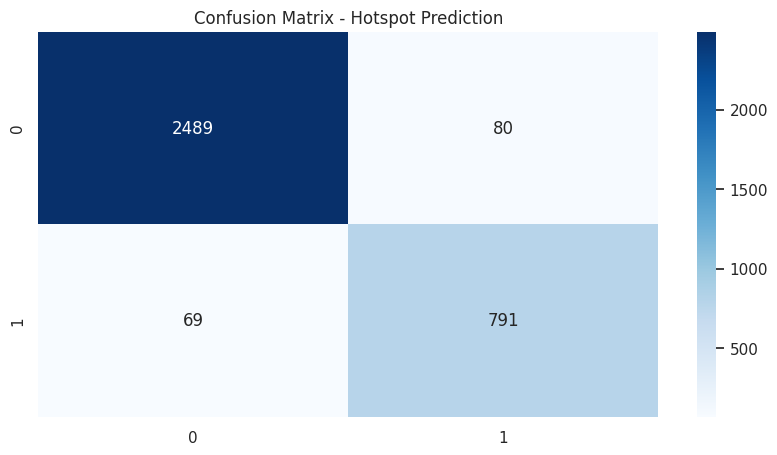

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

cat = "Burglary at residential premises"
df_cat = df_feat[df_feat['Category'] == cat].copy()

features = ['lag1','avg_prev3','station_mean','Province']
X = df_cat[features]
y = df_cat['hotspot']

train = df_cat[df_cat['Year'] <= 2013]
test  = df_cat[df_cat['Year'] > 2013]

X_train = train[features]
y_train = train['hotspot']
X_test = test[features]
y_test = test['hotspot']

num_cols = ['lag1','avg_prev3','station_mean']
cat_cols = ['Province']

pre = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

clf = Pipeline([
    ('pre', pre),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Hotspot Prediction")
plt.show()


Time series Forcasting

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


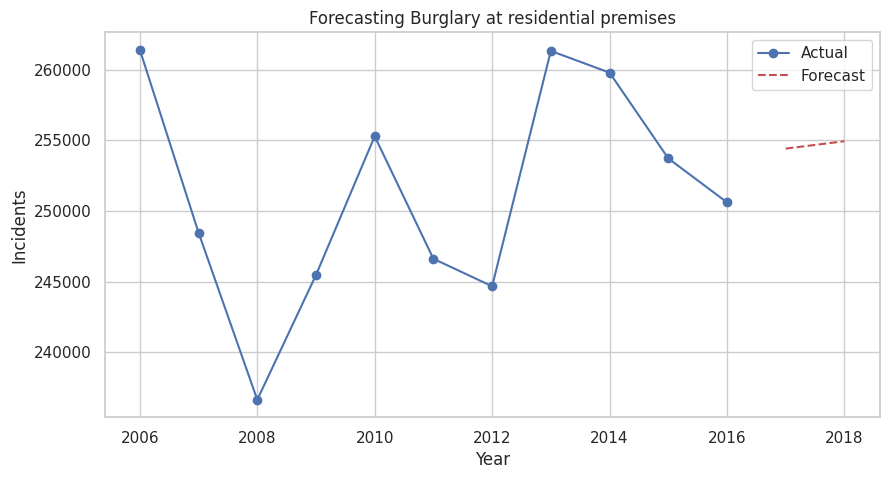

2017: 254,408 predicted incidents
2018: 254,931 predicted incidents


In [90]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Use the 'long' DataFrame instead of df_merged
ts = long[long['Category'] == cat].groupby('Year')['Count'].sum().reset_index()

model = LinearRegression()
model.fit(ts[['Year']], ts['Count'])

future_years = np.array([2017, 2018]).reshape(-1,1)
preds = model.predict(future_years)

plt.plot(ts['Year'], ts['Count'], marker='o', label='Actual')
plt.plot(future_years, preds, 'r--', label='Forecast')
plt.legend()
plt.title(f"Forecasting {cat}") # Removed " (Merged Dataset)" as it's now using the combined long data
plt.xlabel("Year")
plt.ylabel("Incidents")
plt.show()

for y,p in zip(future_years.flatten(), preds):
    print(f"{y}: {p:,.0f} predicted incidents")

Hotspot and lag features

In [91]:
# Hotspot label: top 25% stations by Count for each Year+Category
long['hotspot'] = long.groupby(['Year','Category'])['Count'].transform(lambda x: (x >= x.quantile(0.75)).astype(int))

# compute lags per Station+Category
def compute_lags(group):
    g = group.sort_values('Year').copy()
    g['lag1'] = g['Count'].shift(1)
    g['avg_prev3'] = g['Count'].shift(1).rolling(window=3, min_periods=1).mean()
    g['station_mean'] = g['Count'].mean()
    return g

long2 = long.groupby(['Station','Category'], group_keys=False).apply(compute_lags).reset_index(drop=True)

# Drop first-year rows where lag1 is NaN
df_feat = long2.dropna(subset=['lag1']).copy()
df_feat['avg_prev3'] = df_feat['avg_prev3'].fillna(df_feat['lag1'])
print("Prepared features rows:", df_feat.shape[0])
display(df_feat[['Province','Station','Category','Year','Count','lag1','avg_prev3','station_mean','hotspot']].head(8))



Prepared features rows: 308610


/tmp/ipython-input-4236891971.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  long2 = long.groupby(['Station','Category'], group_keys=False).apply(compute_lags).reset_index(drop=True)


,Province,Station,Category,Year,Count,lag1,avg_prev3,station_mean,hotspot
30861,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2007,6341,6692.0,6692.0,5602.818182,1
30862,Gauteng,Jhb Central,All theft not mentioned elsewhere,2007,4602,6093.0,6093.0,3471.545455,1
30863,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2007,6093,5341.0,5341.0,5511.272727,1
30864,Free State,Park Road,All theft not mentioned elsewhere,2007,4282,5108.0,5108.0,3252.363636,1
30865,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2007,4536,5099.0,5099.0,3262.636364,1
30866,North West,Rustenburg,All theft not mentioned elsewhere,2007,4173,4239.0,4239.0,2702.909091,1
30867,Kwazulu/Natal,Durban Central,All theft not mentioned elsewhere,2007,4529,4162.0,4162.0,3402.090909,1
30868,Gauteng,Brooklyn,All theft not mentioned elsewhere,2007,3583,3931.0,3931.0,2565.363636,1


Category time series aggregate graph

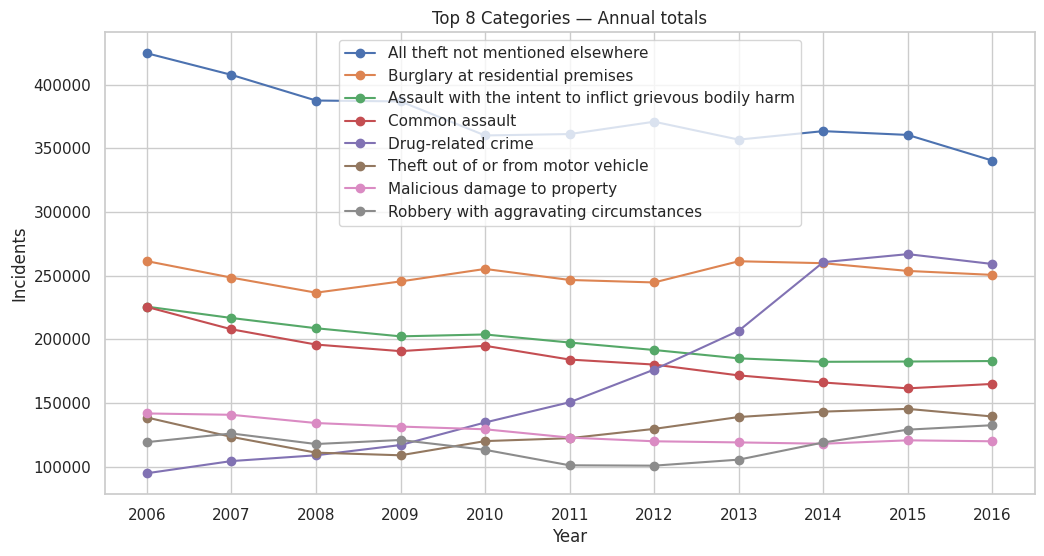

In [92]:
# Aggregate by Year and Category
agg_cat = long.groupby(['Year','Category'])['Count'].sum().reset_index()

# Top 8 categories by total count for plotting
top_cats = agg_cat.groupby('Category')['Count'].sum().sort_values(ascending=False).head(8).index.tolist()
plt.figure(figsize=(12,6))
for cat in top_cats:
    s = agg_cat[agg_cat['Category']==cat].sort_values('Year')
    plt.plot(s['Year'], s['Count'], marker='o', label=cat)
plt.legend()
plt.title("Top 8 Categories — Annual totals")
plt.xlabel("Year")
plt.ylabel("Incidents")
plt.xticks(sorted(agg_cat['Year'].unique()))
plt.show()

Top N stations for a selected category(bar graph)

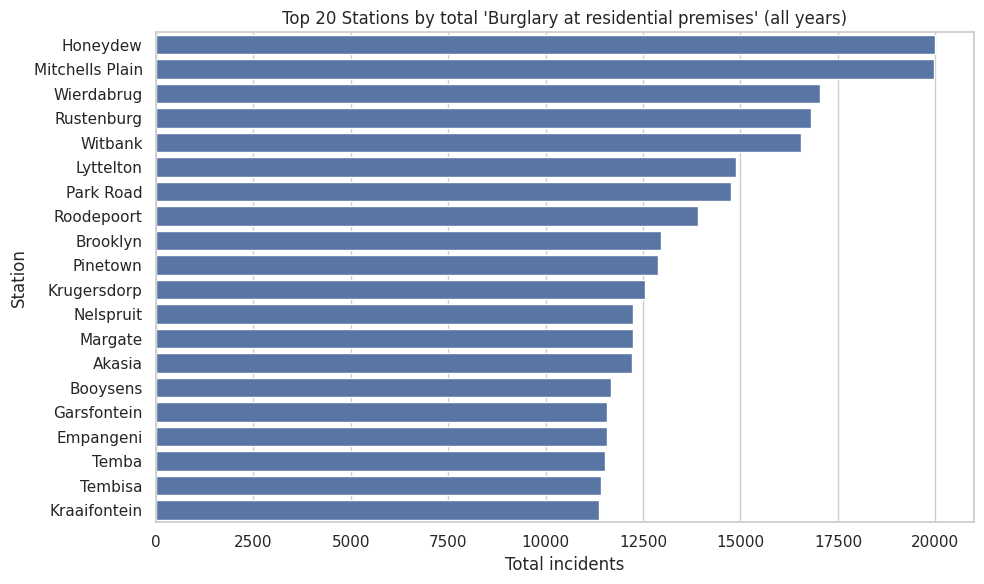

In [93]:
# Choose category to inspect
selected_cat = 'Burglary at residential premises'  # change as needed
cat_df = long[(long['Category']==selected_cat)].groupby('Station')['Count'].sum().sort_values(ascending=False)
topN = 20
plt.figure(figsize=(10,6))
sns.barplot(x=cat_df.head(topN).values, y=cat_df.head(topN).index)
plt.title(f"Top {topN} Stations by total '{selected_cat}' (all years)")
plt.xlabel("Total incidents")
plt.ylabel("Station")
plt.tight_layout()
plt.show()

Heatmap (stations v years)

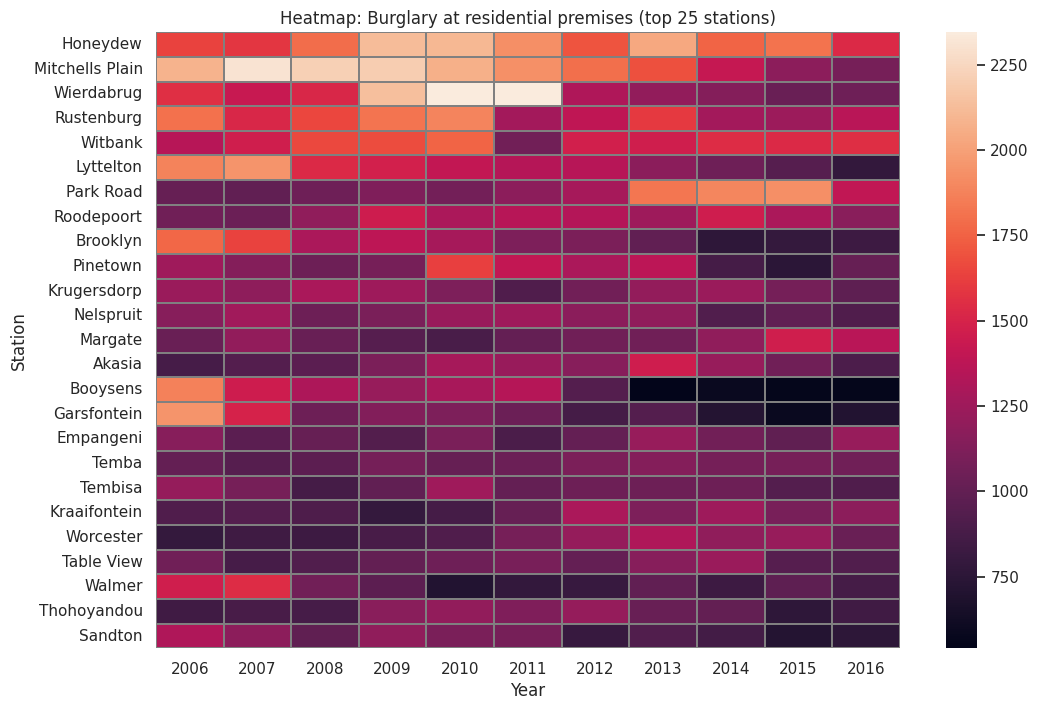

In [94]:
# pivot for heatmap
hf = long[long['Category']==selected_cat].pivot_table(index='Station', columns='Year', values='Count', aggfunc='sum', fill_value=0)
# reduce to top 25 stations for readability
hf_top = hf.loc[cat_df.head(25).index]
plt.figure(figsize=(12,8))
sns.heatmap(hf_top, linewidths=0.3, linecolor='gray')
plt.title(f"Heatmap: {selected_cat} (top 25 stations)")
plt.ylabel("Station")
plt.xlabel("Year")
plt.show()

Percent change by category between last 2 years

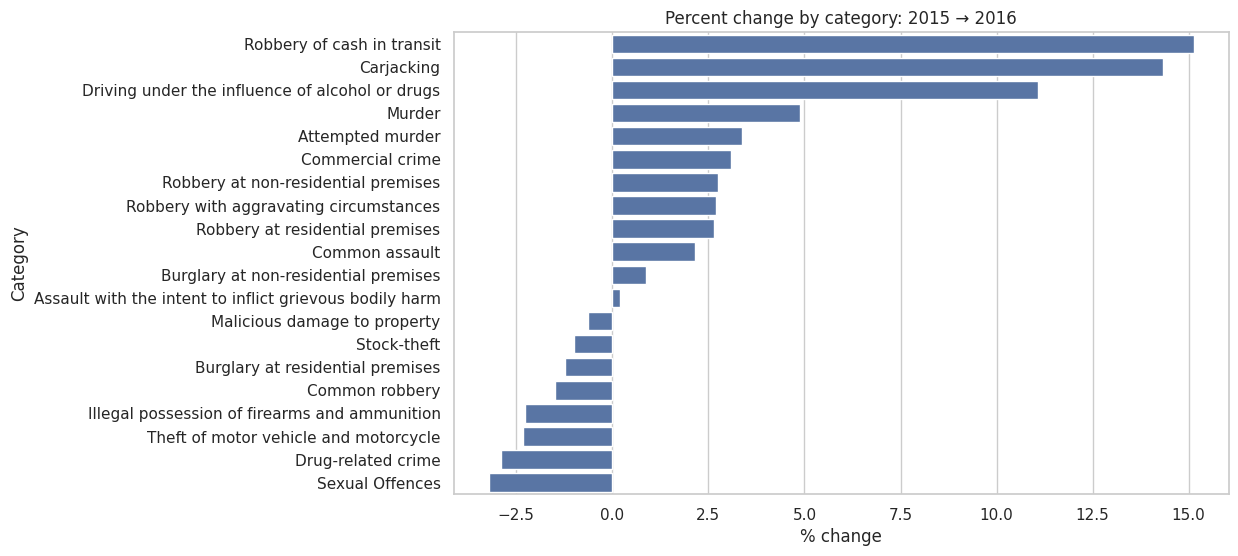

In [95]:
# calc percent change last two available years per category
years_sorted = sorted(long['Year'].dropna().unique())
if len(years_sorted) >= 2:
    y1, y2 = years_sorted[-2], years_sorted[-1]
    tot_y1 = long[long['Year']==y1].groupby('Category')['Count'].sum()
    tot_y2 = long[long['Year']==y2].groupby('Category')['Count'].sum()
    pct = ((tot_y2 - tot_y1) / tot_y1.replace(0,np.nan) * 100).replace([np.inf, -np.inf], np.nan).fillna(0)
    pct = pct.sort_values(ascending=False).head(20)
    plt.figure(figsize=(10,6))
    sns.barplot(x=pct.values, y=pct.index)
    plt.title(f"Percent change by category: {y1} → {y2}")
    plt.xlabel("% change")
    plt.show()
else:
    print("Not enough distinct years to compute percent change.")

2nd One

hotspot classification

In [98]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Example: train RandomForest to predict hotspots for 'Burglary at residential premises'
cat = 'Burglary at residential premises'  # change as needed
df_cat = df_feat[df_feat['Category'] == cat].copy()
print("Rows for category:", df_cat.shape[0])

# Feature columns
feature_cols = ['lag1','avg_prev3','station_mean','Province']

# time-based split: train <= 2013, test > 2013
train = df_cat[df_cat['Year'] <= 2013]
test  = df_cat[df_cat['Year'] > 2013]

X_train = train[feature_cols].copy(); y_train = train['hotspot'].copy()
X_test  = test[feature_cols].copy();  y_test  = test['hotspot'].copy()

num_cols = ['lag1','avg_prev3','station_mean']
cat_cols = ['Province']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

clf = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
print('ROC-AUC:', round(roc_auc_score(y_test, y_proba), 4))
print('\nClassification report:\n', classification_report(y_test, y_pred))
print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred))

# Save pipeline for later use
joblib.dump(clf, '/mnt/data/hotspot_rf_pipeline.joblib')
print("Saved pipeline to /mnt/data/hotspot_rf_pipeline.joblib")

Rows for category: 11430
Accuracy: 0.9565
ROC-AUC: 0.9896

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2569
           1       0.91      0.92      0.91       860

    accuracy                           0.96      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.96      0.96      0.96      3429


Confusion matrix:
 [[2489   80]
 [  69  791]]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/hotspot_rf_pipeline.joblib'

Feature importance plot

,0
lag1,0.375330
station_mean,0.311318
avg_prev3,0.271291
Province_Gauteng,0.021058
Province_Northern Cape,0.006300
Province_Western Cape,0.003683
Province_Eastern Cape,0.003061
Province_Kwazulu/Natal,0.001698
Province_Free State,0.001687
Province_Limpopo,0.001653


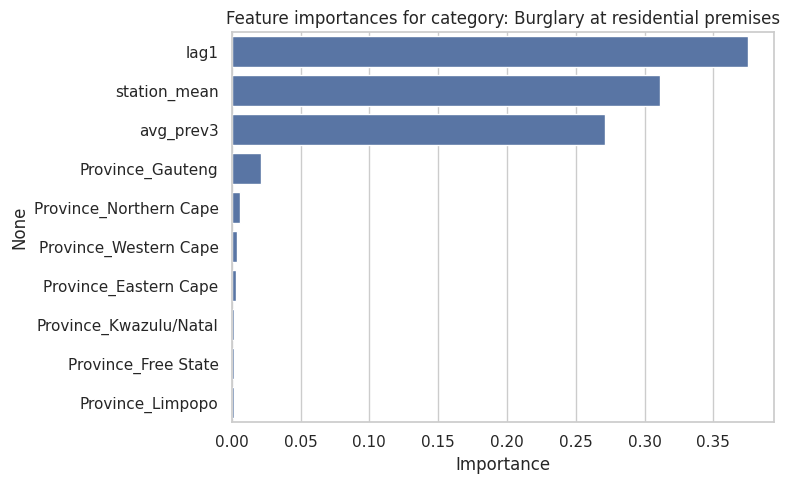

In [99]:
# Extract feature names after preprocessing
# get feature names from preprocessor (OneHotEncoder)
ohe = clf.named_steps['pre'].named_transformers_['cat']
ohe_cols = list(ohe.get_feature_names_out(cat_cols)) if hasattr(ohe,'get_feature_names_out') else []
feat_names = num_cols + ohe_cols
importances = clf.named_steps['rf'].feature_importances_

fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)
display(fi.head(20))

# Plot top 10
plt.figure(figsize=(8,5))
sns.barplot(x=fi.head(10).values, y=fi.head(10).index)
plt.title(f"Feature importances for category: {cat}")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Forcasting(linear trend) and Prophet templates

,Year,Count
0,2006,261403
1,2007,248462
2,2008,236638
3,2009,245465
4,2010,255278
5,2011,246612
6,2012,244667
7,2013,261319
8,2014,259784
9,2015,253716


Linear forecast:
2017 -> 254408
2018 -> 254931


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4opcef/wt9ml356.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8m4opcef/be_tp1ah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23667', 'data', 'file=/tmp/tmp8m4opcef/wt9ml356.json', 'init=/tmp/tmp8m4opcef/be_tp1ah.json', 'output', 'file=/tmp/tmp8m4opcef/prophet_model5xshgc89/prophet_model-20251006123932.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:39:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

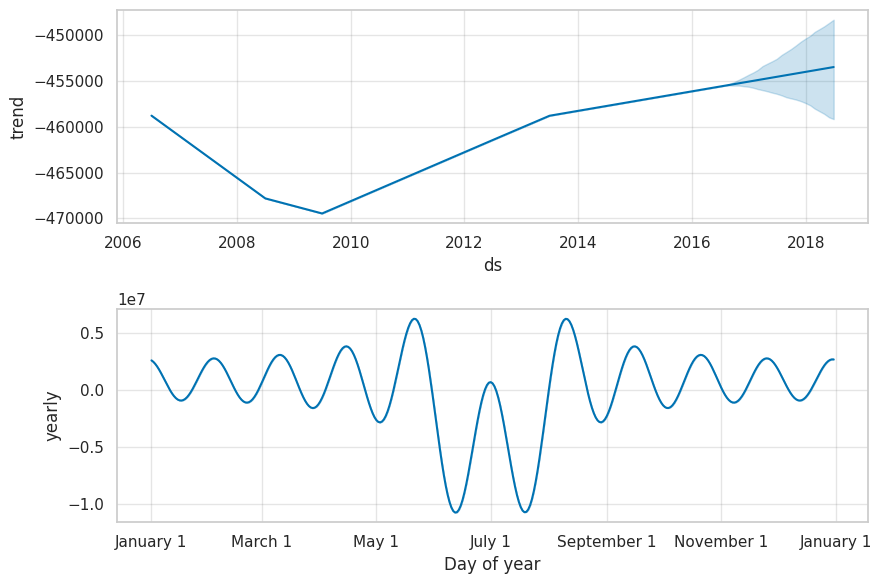

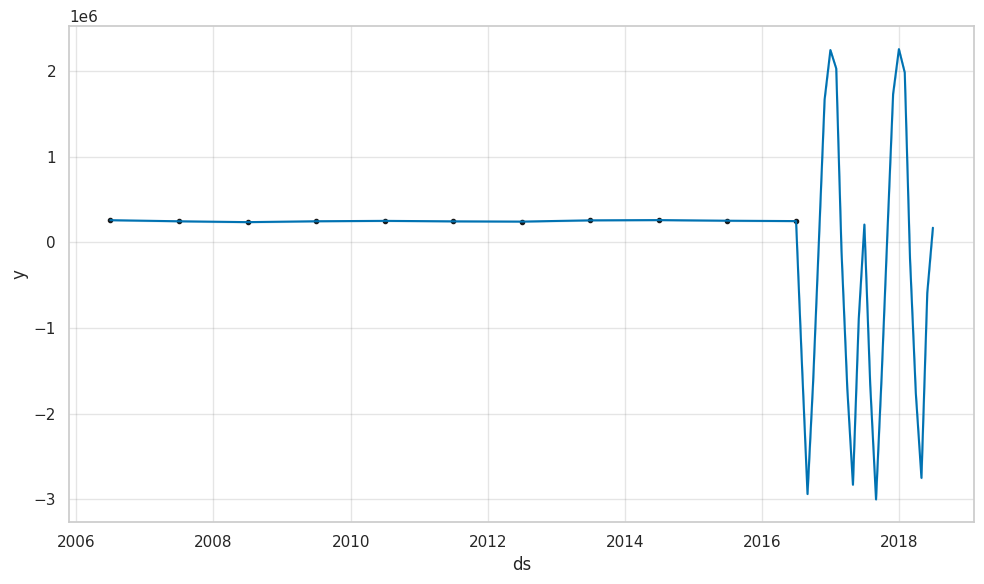

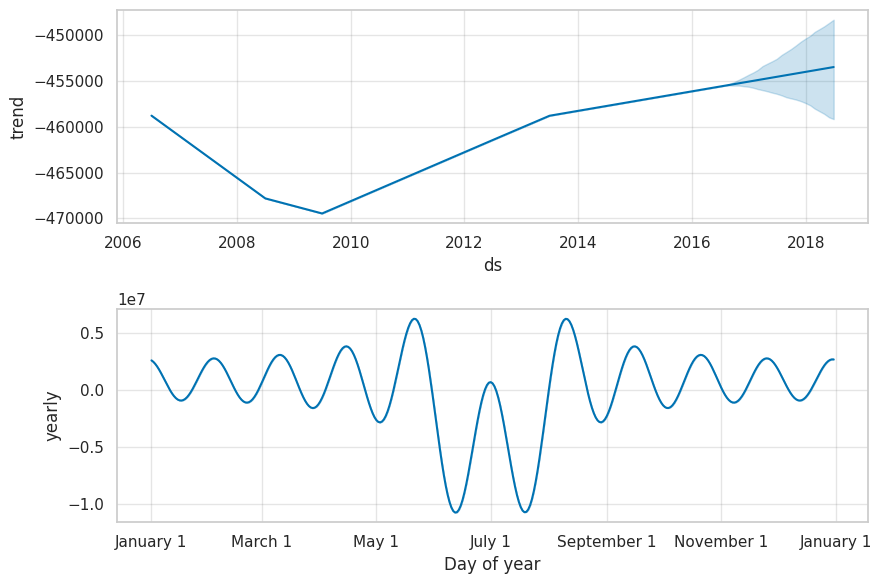

In [105]:
# Aggregate annual totals for selected category
ts_df = long[long['Category']==cat].groupby('Year')['Count'].sum().reset_index().sort_values('Year')
display(ts_df)

# Simple linear trend (quick baseline)
from sklearn.linear_model import LinearRegression
X = ts_df['Year'].values.reshape(-1,1)
y = ts_df['Count'].values
lr = LinearRegression(); lr.fit(X,y)
future_years = np.array([ts_df['Year'].max()+1, ts_df['Year'].max()+2]).reshape(-1,1)
preds = lr.predict(future_years)
print("Linear forecast:")
for yr,p in zip(future_years.flatten(), preds):
    print(int(yr), "->", int(p))


from prophet import Prophet
ts = ts_df.rename(columns={'Year':'ds', 'Count':'y'})
ts['ds'] = pd.to_datetime(ts['ds'].astype(str) + '-07-01')  # mid-year
m = Prophet(interval_width=0.95, yearly_seasonality=True)
m.fit(ts[['ds','y']])
future = m.make_future_dataframe(periods=24, freq='M')  # or periods=2 for yearly predictions
forecast = m.predict(future)
m.plot(forecast); m.plot_components(forecast)

Streamlit app skeleton

In [109]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.4 MB/s eta 0:00:00


In [ ]:

streamlit_app_code = r'''
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib

st.set_page_config(layout='wide', page_title='SA Crime Analytics')
st.title('South Africa Crime Analytics Dashboard')

# Adjust path to my long table CSV
df = pd.read_csv('/mnt/data/SouthAfricaCrimeStats_v2_long.csv')  # ensure you save the long table earlier

category = st.sidebar.selectbox('Crime Category', df['Category'].unique())
year = st.sidebar.slider('Year', int(df['Year'].min()), int(df['Year'].max()), int(df['Year'].max()))

subset = df[(df['Category']==category) & (df['Year']<=year)]
agg = subset.groupby('Year')['Count'].sum().reset_index()

fig = px.line(agg, x='Year', y='Count', title=f'{category} trend')
st.plotly_chart(fig, use_container_width=True)

st.subheader('Top Stations (latest year)')
latest = df[df['Year']==year]
top = latest[latest['Category']==category].groupby('Station')['Count'].sum().reset_index().sort_values('Count', ascending=False).head(20)
st.dataframe(top)

st.subheader('Hotspot predictions (sample)')
try:
    clf = joblib.load('/mnt/data/hotspot_rf_pipeline.joblib')
    sample = latest[latest['Category']==category].head(50)[['lag1','avg_prev3','station_mean','Province']].fillna(0)
    preds = clf.predict(sample)
    st.write(preds[:10])
except Exception as e:
    st.write('Load pipeline not found:', e)
'''

with open('/mnt/data/streamlit_app.py', 'w') as f:
    f.write(streamlit_app_code)

print("Saved Streamlit template to /mnt/data/streamlit_app.py")
print("Run locally or in an environment with Streamlit: streamlit run /mnt/data/streamlit_app.py")

streamlit Dashboard

In [106]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

st.title(" South Africa Crime Analytics Dashboard")

@st.cache_data
def load_data():
    df = pd.read_csv("SouthAfricaCrimeStats_v2.csv")
    return df

df = load_data()
category = st.sidebar.selectbox("Select Category", df['Category'].unique())
subset = df[df['Category']==category]

agg = subset.groupby('Year')['Count'].sum().reset_index()
fig = px.line(agg, x='Year', y='Count', title=f"{category} Over Time")
st.plotly_chart(fig)

Writing app.py


In [ ]:
%%shell
streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.92.118:8501



Drone if I was asked to write a code

In [ ]:
# Drone mission builder skeleton (requires lat/lon coordinates for stations)
# If I have station coordinates, create pois = [(lon1, lat1), ...] and run this snippet.

def build_greedy_mission(pois, start=(0.0,0.0), altitude=50):
    import numpy as np
    remaining = pois.copy()
    current = np.array(start)
    order = []
    while remaining:
        dists = [np.linalg.norm(np.array(p)-current) for p in remaining]
        i = int(np.argmin(dists))
        order.append(remaining.pop(i))
        current = np.array(order[-1])
    # mission representation
    mission = [('TAKEOFF', altitude)]
    for lon,lat in order:
        mission.append(('GOTO', float(lon), float(lat), altitude))
        mission.append(('HOVER', 2))
    mission.append(('LAND',))
    return mission

# Example usage:
sample_pois = [(28.2, -25.7), (28.3, -25.72), (28.15, -25.68)]
mission = build_greedy_mission(sample_pois, start=(28.19,-25.71), altitude=50)
print("Mission:", mission)

Saving the long table so streamlit can load it easily

In [ ]:
# Save long table to /mnt/data for other scripts (like the Streamlit skeleton)
out_path = '/mnt/data/SouthAfricaCrimeStats_v2_long.csv'
long.to_csv(out_path, index=False)
print("Saved long table to", out_path)

Model and Evaluation and improvement

In [ ]:
importances = clf.named_steps['rf'].feature_importances_
feat_names = clf.named_steps['pre'].get_feature_names_out()
imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Feature Importances - Hotspot Model")
plt.show()